In [57]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
df = pd.read_csv('loan_approval_dataset.csv')
df.head()
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# MENGAMBIL DATA DARI FILE YANG BARU

In [35]:
df.drop(['loan_id'], axis=1, inplace=True)

# MENDROP DATA YANG TIDAK DI BUTUHKAN YAITU ID 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


#MENGECEK DATA 

In [39]:
min_max_scaler = MinMaxScaler()
df[[' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']] = min_max_scaler.fit_transform(df[
   [' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']])
col = [' education', ' self_employed',' loan_status']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1
5,0.0,0,1,0.474227,0.336735,0.444444,0.031667,0.236301,0.427835,0.344473,0.346939,1
6,1.0,0,0,0.876289,0.834184,0.111111,0.630000,0.773973,0.762887,0.742931,0.292517,0
7,0.4,0,1,0.567010,0.375000,1.000000,0.136667,0.455479,0.293814,0.295630,0.408163,1
8,0.0,0,1,0.061856,0.048469,1.000000,0.803333,0.047945,0.041237,0.064267,0.040816,0
9,1.0,1,0,0.092784,0.102041,0.444444,0.146667,0.113014,0.072165,0.077121,0.108844,1


# ENCODING DATA AGAR MENJADI LEBIH KECIL DAN RINGAN

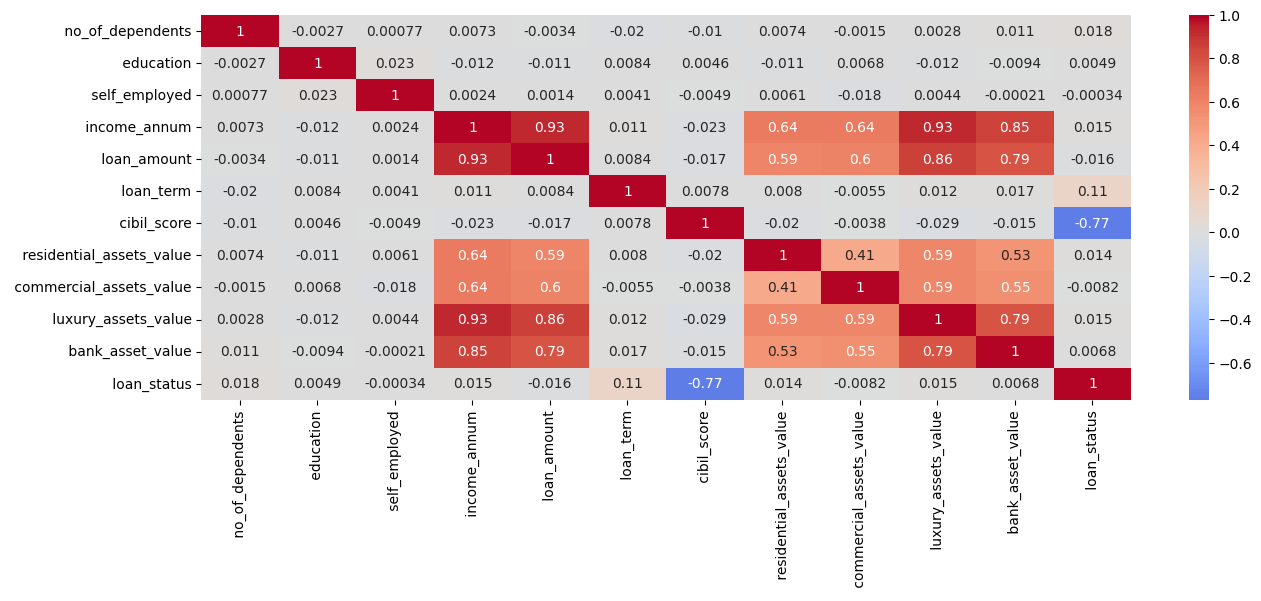

In [47]:
plt.figure(figsize=(15,5))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, center=0)
plt.show()

# MENGECEK KORELASI ANTAR KOLOM FEATURE

In [50]:
X = df[[' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value',' education', ' self_employed']]
y = df[' loan_status']

X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SPLIT DATA TRAIN

In [51]:
from keras.api._v2.keras import activations
model = Sequential([
    layers.Dense(
        16,
        activation='relu',
        input_shape=[11]
    ),
    layers.Dense(
        32,
        activation = 'relu'
    ),
    layers.Dense(
        1,
        activation='sigmoid'
    ),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
     

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# MEMBUAT LAYER ACTIVATION

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#MEMBUAT CALLBACK

In [53]:
trained_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=early_stop)

Epoch 1/500
107/107 [==============================] - 1s 3ms/step - loss: 0.6390 - accuracy: 0.6155 - val_loss: 0.5913 - val_accuracy: 0.6288
Epoch 2/500
107/107 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7388 - val_loss: 0.4133 - val_accuracy: 0.8361
Epoch 3/500
107/107 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8855 - val_loss: 0.2824 - val_accuracy: 0.8876
Epoch 4/500
107/107 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9004 - val_loss: 0.2458 - val_accuracy: 0.8993
Epoch 5/500
107/107 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9107 - val_loss: 0.2448 - val_accuracy: 0.8981
Epoch 6/500
107/107 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9142 - val_loss: 0.2181 - val_accuracy: 0.9098
Epoch 7/500
107/107 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9165 - val_loss: 0.2107 - val_accuracy: 0.9133

# PROSES LEARNING DATA

In [54]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9731


[0.07290919125080109, 0.9730679392814636]

# PREDICT DATA

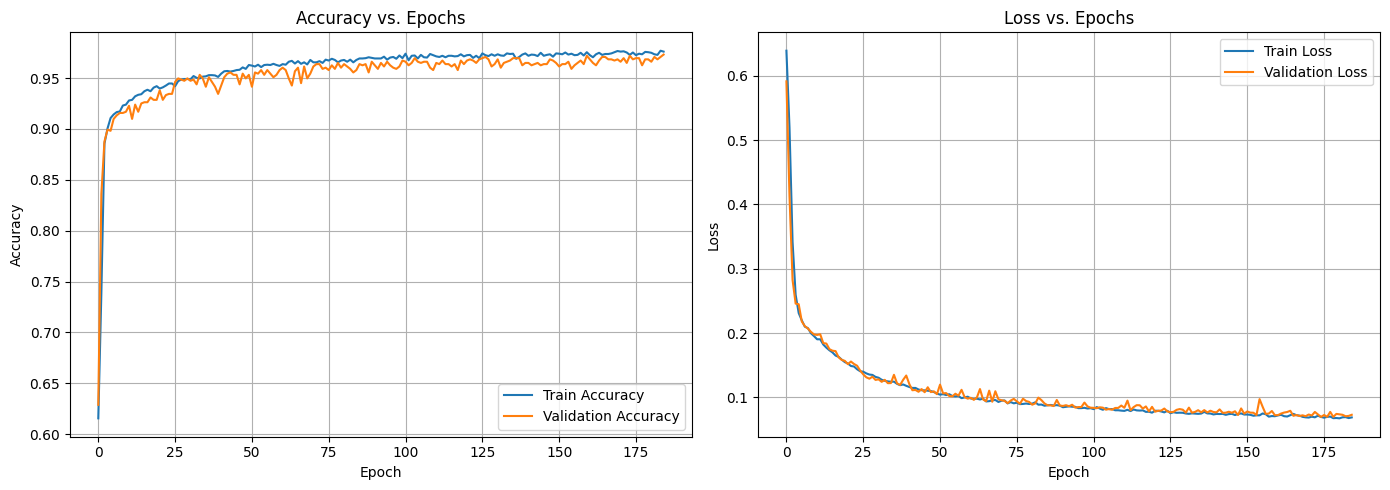

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(trained_data.history['accuracy'], label='Train Accuracy')
plt.plot(trained_data.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# MEMBUAT GRAFIK YANG MENAMPILKAN PERGERAKAN MATRIX DAN LOSS TERHADAP EPOCH BAIK DARI TRAINING